In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer,AutoModel
import re
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame()
df = pd.read_csv("/content/drive/MyDrive/Train.csv", encoding="utf-8")

In [ ]:
df = df.reset_index(drop=True)
df=df.astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3492 non-null   object
 1   cmt              3492 non-null   object
 2   Spell_corrected  3492 non-null   object
 3   tên              3492 non-null   object
 4   vận chuyển       3492 non-null   object
 5   giá              3492 non-null   object
 6   đóng gói         3492 non-null   object
 7   dịch vụ          3492 non-null   object
 8   mùi hương        3492 non-null   object
 9   chất lượng       3492 non-null   object
 10  kết cấu          3492 non-null   object
 11  độ bền           3492 non-null   object
 12  Màu sắc          3492 non-null   object
 13  tokenized_text   3492 non-null   object
dtypes: object(14)
memory usage: 382.1+ KB
None


In [ ]:
# df = df.drop(columns=['Unnamed: 0'])
dw = df.copy()

In [ ]:
#dw['chất lượng'] = dw['chất lượng'].astype(float)
dw['kết cấu'] = dw['kết cấu'].astype(float)
dw['vận chuyển'] = dw['vận chuyển'].astype(float)
dw['giá'] = dw['giá'].astype(float)
dw['đóng gói'] = dw['đóng gói'].astype(float)
dw['dịch vụ'] = dw['dịch vụ'].astype(float)
dw['mùi hương'] = dw['mùi hương'].astype(float)
dw['độ bền'] = dw['độ bền'].astype(float)
dw['Màu sắc'] = dw['Màu sắc'].astype(float)

In [ ]:
dw.columns

Index(['Unnamed: 0', 'cmt', 'Spell_corrected', 'tên', 'vận chuyển', 'giá',
       'đóng gói', 'dịch vụ', 'mùi hương', 'chất lượng', 'kết cấu', 'độ bền',
       'Màu sắc', 'tokenized_text'],
      dtype='object')

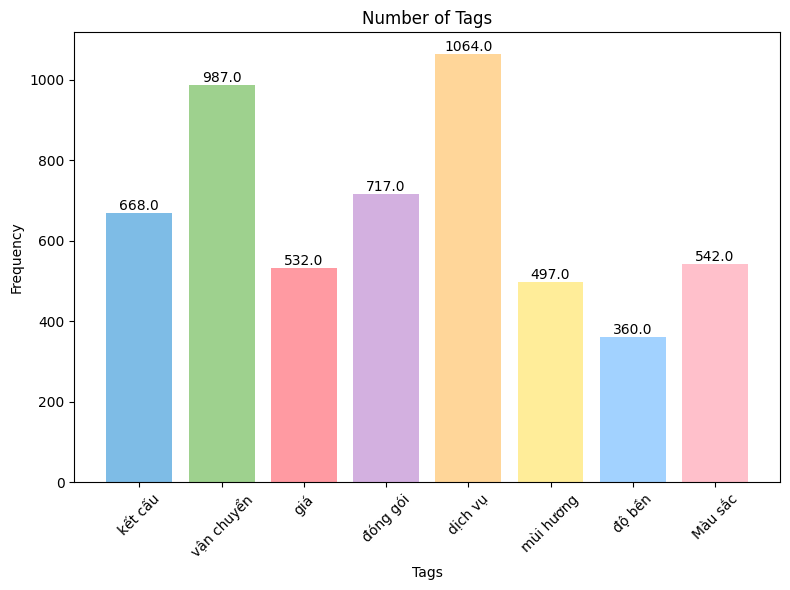

In [ ]:
import matplotlib.pyplot as plt

colors = ['#7ebce6', '#9ed18e', '#ff9aa2', '#d3b0e0', '#ffd699', '#ffed99', '#a2d2ff', '#ffc0cb']
type_counts = dw[['kết cấu', 'vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'độ bền', 'Màu sắc']].sum()

tags = type_counts.index.tolist()
counts = type_counts.tolist()

plt.figure(figsize=(8, 6))
bars = plt.bar(tags, counts, color=colors)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Number of Tags')
plt.xticks(rotation=45)

# Adding counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


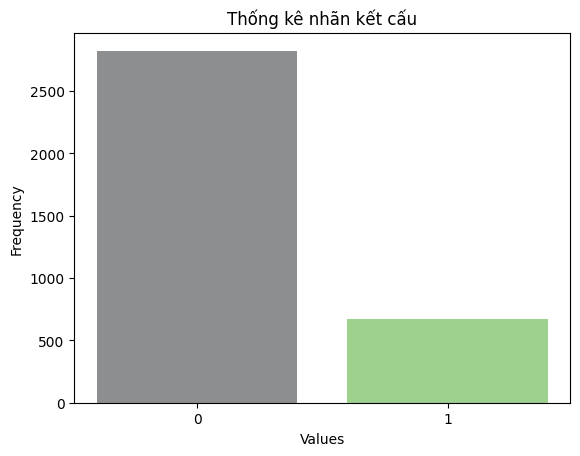

In [ ]:
type_cl_lb = dw['kết cấu'].value_counts()


# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
values = type_cl_lb.values.tolist()

plt.bar(labels, values, color=['#8c8e8f', '#9ed18e'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Thống kê nhãn kết cấu')
plt.xticks(labels)  # Đặt nhãn trục x là các giá trị duy nhất (0 và 1)
plt.show()

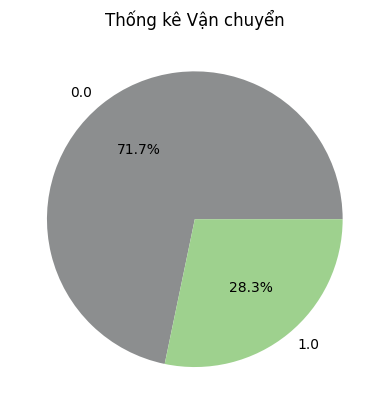

0.0    2505
1.0     987
Name: vận chuyển, dtype: int64

In [ ]:
type_cl_lb = dw['vận chuyển'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#9ed18e'], autopct='%1.1f%%')
plt.title('Thống kê Vận chuyển')
plt.show()

dw['vận chuyển'].value_counts()

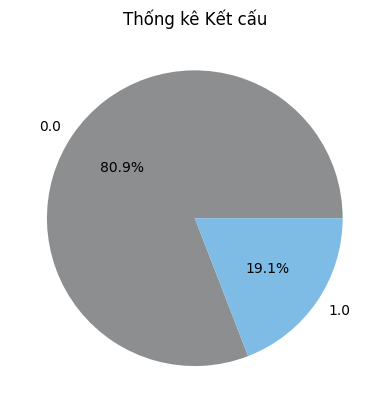

0.0    2824
1.0     668
Name: kết cấu, dtype: int64

In [ ]:
type_cl_lb = dw['kết cấu'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#7ebce6'], autopct='%1.1f%%')
plt.title('Thống kê Kết cấu')
plt.show()

dw['kết cấu'].value_counts()

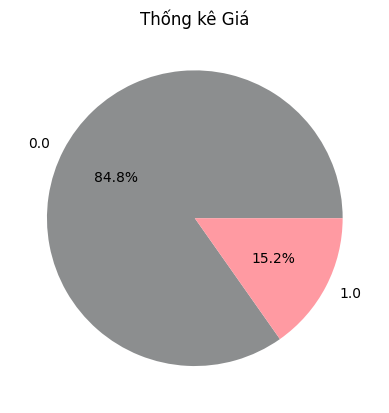

0.0    2960
1.0     532
Name: giá, dtype: int64

In [ ]:
type_cl_lb = dw['giá'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#ff9aa2'], autopct='%1.1f%%')
plt.title('Thống kê Giá')
plt.show()

dw['giá'].value_counts()

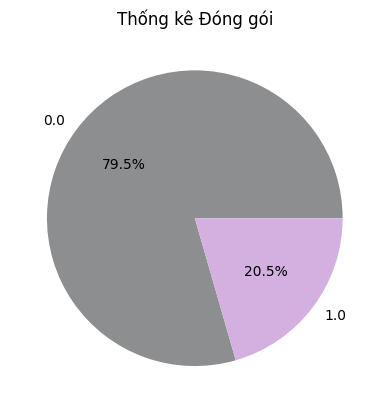

0.0    2824
1.0     668
Name: kết cấu, dtype: int64

In [ ]:
type_cl_lb = dw['đóng gói'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#d3b0e0'], autopct='%1.1f%%')
plt.title('Thống kê Đóng gói')
plt.show()

dw['kết cấu'].value_counts()

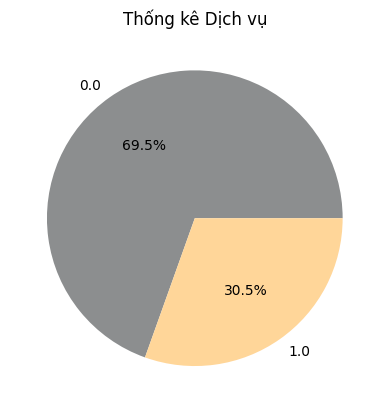

0.0    2428
1.0    1064
Name: dịch vụ, dtype: int64

In [ ]:
type_cl_lb = dw['dịch vụ'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#ffd699'], autopct='%1.1f%%')
plt.title('Thống kê Dịch vụ')
plt.show()

dw['dịch vụ'].value_counts()

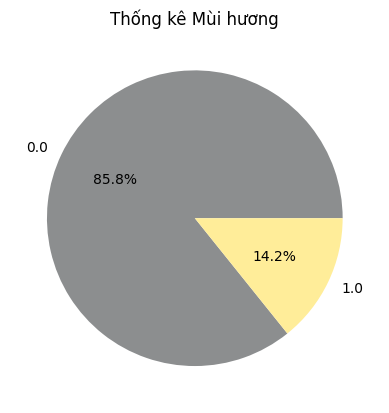

0.0    2995
1.0     497
Name: mùi hương, dtype: int64

In [ ]:
type_cl_lb = dw['mùi hương'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#ffed99'], autopct='%1.1f%%')
plt.title('Thống kê Mùi hương')
plt.show()

dw['mùi hương'].value_counts()

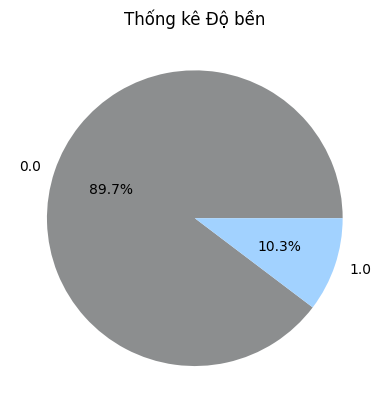

0.0    3132
1.0     360
Name: độ bền, dtype: int64

In [ ]:
type_cl_lb = dw['độ bền'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#a2d2ff'], autopct='%1.1f%%')
plt.title('Thống kê Độ bền')
plt.show()

dw['độ bền'].value_counts()

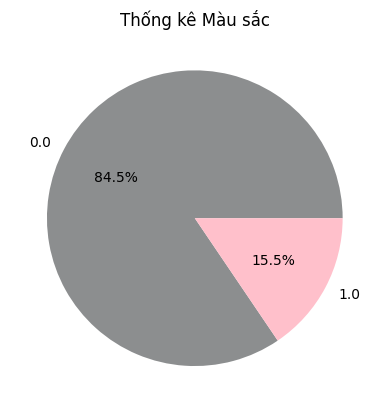

0.0    2950
1.0     542
Name: Màu sắc, dtype: int64

In [ ]:
type_cl_lb = dw['Màu sắc'].value_counts()

# Vẽ biểu đồ cột
labels = type_cl_lb.index.tolist()
counts_cl = type_cl_lb.values.tolist()
fig, ax = plt.subplots()
plt.pie(counts_cl, labels=labels, colors=['#8c8e8f', '#ffc0cb'], autopct='%1.1f%%')
plt.title('Thống kê Màu sắc')
plt.show()

dw['Màu sắc'].value_counts()

In [ ]:
lb = ['kết cấu', 'vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'độ bền', 'Màu sắc']
for i in lb:
  print(dw[i].value_counts())
  print("-----------------------------------\n")

0.0    2824
1.0     668
Name: kết cấu, dtype: int64
-----------------------------------

0.0    2505
1.0     987
Name: vận chuyển, dtype: int64
-----------------------------------

0.0    2960
1.0     532
Name: giá, dtype: int64
-----------------------------------

0.0    2775
1.0     717
Name: đóng gói, dtype: int64
-----------------------------------

0.0    2428
1.0    1064
Name: dịch vụ, dtype: int64
-----------------------------------

0.0    2995
1.0     497
Name: mùi hương, dtype: int64
-----------------------------------

0.0    3132
1.0     360
Name: độ bền, dtype: int64
-----------------------------------

0.0    2950
1.0     542
Name: Màu sắc, dtype: int64
-----------------------------------



In [ ]:
y = dw[['vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'kết cấu', 'độ bền', 'Màu sắc']]

In [ ]:
print(dw['cmt'].shape)
print(X_train.shape)

(3492,)
(2793, 1000)


In [ ]:
import skmultilearn
dir(skmultilearn)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [ ]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

BinaryRelevance

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)
br_prediction = binary_rel_clf.predict(X_test)
print(br_prediction.toarray())
print(y_test)

[[1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
      vận chuyển  giá  đóng gói  dịch vụ  mùi hương  kết cấu  độ bền  Màu sắc
295          1.0  0.0       1.0      1.0        0.0      0.0     0.0      0.0
718          0.0  0.0       0.0      1.0        0.0      0.0     0.0      0.0
952          0.0  0.0       0.0      1.0        0.0      0.0     0.0      1.0
2561         0.0  0.0       0.0      0.0        0.0      0.0     0.0      0.0
2547         0.0  0.0       0.0      1.0        0.0      0.0     0.0      0.0
...          ...  ...       ...      ...        ...      ...     ...      ...
631          0.0  0.0       0.0      0.0        0.0      0.0     0.0      0.0
1551         0.0  0.0       0.0      0.0        0.0      1.0     1.0      0.0
2880         0.0  0.0       0.0      0.0        0.0      0.0     1.0      0.0
162          1.0  1.0       0.0      1.0        0.0      0.0    

In [ ]:
# Đánh giá hiệu suất của mô hình trên tập test
accuracy_test = accuracy_score(y_test, br_prediction)
print(f"Accuracy trên tập test: {accuracy_test:.2f}")

micro_f1 = f1_score(y_test, br_prediction, average='micro')
print(f"Micro-average F1 score: {micro_f1}")

# Calculate macro-average F1 score
macro_f1 = f1_score(y_test, br_prediction, average='macro')
print(f"Macro-average F1 score: {macro_f1}")

Accuracy trên tập test: 0.48
Micro-average F1 score: 0.6818181818181818
Macro-average F1 score: 0.6272561391301671


In [ ]:
# Đánh giá bằng cross - validation
pred = binary_rel_clf.fit(X_train, y_train)

scorings = ['precision_macro', 'precision_micro', 'f1_macro', 'f1_micro', 'recall_macro', 'recall_micro']

scores = cross_validate(pred, X_train, y_train, cv=5, scoring=scorings)

for metric in scorings:
    score_key = f'test_{metric}'
    metric_scores = scores[score_key]
    print(f"{metric} scores: {metric_scores}\n")

precision_macro scores: [0.90022939 0.90039221 0.91310878 0.91177943 0.9001538 ]

precision_micro scores: [0.85741811 0.89173228 0.88293651 0.8987069  0.884     ]

f1_macro scores: [0.58181361 0.58355362 0.59010041 0.61622254 0.59950572]

f1_micro scores: [0.64821559 0.65938865 0.65682657 0.66401274 0.65481481]

recall_macro scores: [0.4671814  0.47350407 0.46898477 0.48339891 0.47946355]

recall_micro scores: [0.52107728 0.52309469 0.52291422 0.52651515 0.52      ]



In [ ]:
hamming_loss(y_test,br_prediction)

0.10515021459227468

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0, 1.3],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [50, 100, 150],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2, 3, 5, 8, 9],
        'classifier__weights': ['uniform', 'distance'],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__max_iter': [50, 100, 200],
    }
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

clf = GridSearchCV(BinaryRelevance(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)
# print (clf.best_params_, clf.best_score_)

print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Accuracy for each parameter set:
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_micro: 0.6799784464421641

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_macro: 0.6267478928682781

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean precision_micro: 0.8745797888108079

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean precision_macro: 0.8959693574918981

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean recall_micro: 0.5563643216467209

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean recall_macro: 0.5120177170854749

Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_micro: 0.6566516709059134

Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_macro: 0.5942391783901702

Parameter set 2: {'classifier': MultinomialNB(),

In [ ]:
scores = ['f1_micro']
print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")


Accuracy for each parameter set:
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_micro: 0.6799784464421641

Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_micro: 0.6566516709059134

Parameter set 3: {'classifier': MultinomialNB(), 'classifier__alpha': 1.3} - Mean f1_micro: 0.6314607953867748

Parameter set 4: {'classifier': RandomForestClassifier(), 'classifier__criterion': 'gini', 'classifier__n_estimators': 50} - Mean f1_micro: 0.8480801123223809

Parameter set 5: {'classifier': RandomForestClassifier(), 'classifier__criterion': 'gini', 'classifier__n_estimators': 100} - Mean f1_micro: 0.8559145634252108

Parameter set 6: {'classifier': RandomForestClassifier(), 'classifier__criterion': 'gini', 'classifier__n_estimators': 150} - Mean f1_micro: 0.8577729732202943

Parameter set 7: {'classifier': RandomForestClassifier(), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 50} - Mean f1_micro: 0.833

In [ ]:
best_score_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_score_idx].items()}
print(f"Best parameters: {best_params} - Mean f1_micro: {clf.cv_results_['mean_test_f1_micro'][best_score_idx]}")

Best parameters: {'classifier': RandomForestClassifier(), 'criterion': 'gini', 'n_estimators': 150} - Mean f1_micro: 0.8577729732202943


In [ ]:
from sklearn.metrics import hamming_loss

# Lấy chỉ số của mô hình tốt nhất
best_model_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_model_idx].items()}

# Tạo mô hình tốt nhất
best_model = BinaryRelevance(best_params['classifier'])
best_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = best_model.predict(X_test)

# Tính hamming_loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_value)

Hamming Loss: 0.04971387696709585


In [ ]:
# classifier = MultinomialNB(alpha=0.7)

# binary_rel_clf = BinaryRelevance(classifier)
# binary_rel_clf.fit(X_train,y_train)
# br_prediction = binary_rel_clf.predict(X_test)

# micro_f1 = f1_score(y_test, br_prediction, average='micro')
# print(f"Micro-average F1 score: {micro_f1}")

LabelPowerset

In [ ]:
clf = LabelPowerset(MultinomialNB())

clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

# Đánh giá hiệu suất của mô hình trên tập test
accuracy_test = accuracy_score(y_test, clf_prediction)
print(f"Accuracy trên tập test: {accuracy_test}")

micro_f1 = f1_score(y_test, clf_prediction, average='micro')
print(f"Micro-average F1 score: {micro_f1}")

# Calculate macro-average F1 score
macro_f1 = f1_score(y_test, clf_prediction, average='macro')
print(f"Macro-average F1 score: {macro_f1}")

Accuracy trên tập test: 0.3333333333333333
Micro-average F1 score: 0.4489528795811518
Macro-average F1 score: 0.31705557529045436


In [ ]:
# Đánh giá bằng cross - validation
pred = clf.fit(X_train, y_train)

scorings = ['precision_macro', 'precision_micro', 'f1_macro', 'f1_micro', 'recall_macro', 'recall_micro']

scores = cross_validate(pred, X_train, y_train, cv=5, scoring=scorings)

for metric in scorings:
    score_key = f'test_{metric}'
    metric_scores = scores[score_key]
    print(f"{metric} scores: {metric_scores}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision_macro scores: [0.9397592  0.83380957 0.83161598 0.69959438 0.95684279]

precision_micro scores: [0.87681159 0.9023569  0.88679245 0.89344262 0.91698113]

f1_macro scores: [0.29754504 0.32792136 0.28965455 0.28939484 0.31700573]

f1_micro scores: [0.42831858 0.46087704 0.42114695 0.42084942 0.43587444]

recall_macro scores: [0.21399591 0.23592237 0.21100112 0.20707458 0.23367283]

recall_micro scores: [0.28337237 0.30946882 0.27614571 0.27525253 0.28588235]



In [ ]:
hamming_loss(y_test, clf_prediction)

0.1505722460658083

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 50],
    },
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

clf = GridSearchCV(LabelPowerset(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)


print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Accuracy for each parameter set:
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_micro: 0.4773892575424485

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_macro: 0.35602352007177623

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean precision_micro: 0.8855318778730965

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean precision_macro: 0.9163807423781247

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean recall_micro: 0.32686971139571075

Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean recall_macro: 0.260862741926947

Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_micro: 0.43341328798390694

Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_macro: 0.30430430411369397

Parameter set 2: {'classifier': MultinomialNB

Classifier Chains


In [ ]:
cc = ClassifierChain(MultinomialNB())
cc.fit(X_train, y_train)

cc_predictions = cc.predict(X_test)

# Check For Accuracy
accuracy_test = accuracy_score(y_test, cc_predictions)
print(f"Accuracy trên tập test: {accuracy_test}")

micro_precison = precision_score(y_test, cc_predictions, average='micro')
print(f"Micro-average Precision score: {micro_precison}")

# Calculate macro-average F1 score
macro_precison = precision_score(y_test, cc_predictions, average='macro')
print(f"Macro-average Precision score: {macro_precison}")

Accuracy trên tập test: 0.46924177396280403
Micro-average Precision score: 0.863225806451613
Macro-average Precision score: 0.8674372515358605


In [ ]:
pred = cc.fit(X_train, y_train)

scorings = ['precision_macro', 'precision_micro', 'f1_macro', 'f1_micro', 'recall_macro', 'recall_micro']

scores = cross_validate(pred, X_train, y_train, cv=5, scoring=scorings)

for metric in scorings:
    score_key = f'test_{metric}'
    metric_scores = scores[score_key]
    print(f"{metric} scores: {metric_scores}\n")

precision_macro scores: [0.82522251 0.85219459 0.84367572 0.82618036 0.8521802 ]

precision_micro scores: [0.79383117 0.83164983 0.82711864 0.82439926 0.84429066]

f1_macro scores: [0.61984678 0.62997792 0.62807086 0.63404312 0.64551795]

f1_micro scores: [0.66530612 0.67671233 0.67730743 0.66916729 0.68347339]

recall_macro scores: [0.53628986 0.54065539 0.5305393  0.53690898 0.54454006]

recall_micro scores: [0.57259953 0.5704388  0.57344301 0.56313131 0.57411765]



In [ ]:
hamming_loss(y_test, cc_predictions)

0.10568669527896996

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

labels = ['vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'kết cấu', 'độ bền', 'màu sắc']

# micro_precison = precision_score(y_test, cc_predictions, average='micro')
# print(f"Micro-average Precision score: {micro_precison}")

# conf = multilabel_confusion_matrix(cc_predictions, y_test)

conf_2d = conf.reshape(8, 4)

conf_matrices = multilabel_confusion_matrix(y_test, cc_predictions)

# Generate and display heatmaps for each label's confusion matrix
for i, label in enumerate(labels):
    plt.figure(figsize=(5, 4))  # Adjust figure size if needed
    sns.heatmap(conf_matrices[i], annot=True, cmap='YlGnBu', fmt='d',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for Label: {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


NameError: ignored

In [ ]:
labels = ['vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'kết cấu', 'độ bền', 'màu sắc']

print(classification_report(y_test, cc_predictions, target_names=labels))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 50],
    },
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

clf = GridSearchCV(ClassifierChain(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)
# print (clf.best_params_, clf.best_score_)

print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")